In [79]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

Loading the Data

In [80]:
dtest = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [81]:
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Understanding the Data


In [82]:
df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [83]:
df.groupby(['Sex'],as_index=False)['Survived'].mean()



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [84]:
df.groupby(['SibSp'],as_index=False)['Survived'].mean()


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [85]:
df.groupby(['Parch'],as_index=False)['Survived'].mean()


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [86]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1
df.groupby(['FamilySize'],as_index=False)['Survived'].mean()

dtest['FamilySize'] = dtest['SibSp'] + dtest['Parch'] +1

Handling Data, Missing Values, Normalizing, Scaling

In [87]:
df.info()
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [88]:
null_values = df.isnull().sum()
null_values

null_values = dtest.isnull().sum()
null_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [89]:
total_cells = np.product(df.shape)
total_missing = null_values.sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of total data",percent_missing)

percentage_null_age = (df['Age'].isnull().sum()/df['Age'].shape[0]) *100
percentage_null_cabin = (df['Cabin'].isnull().sum()/df['Cabin'].shape[0]) *100

print("Percentage Age: %",percentage_null_age,"Percentage Cabin: %",percentage_null_cabin)


Percentage of total data 3.5742035742035743
Percentage Age: % 19.865319865319865 Percentage Cabin: % 77.10437710437711


- 8% of the data is missing, this is few data
- 19% of the Age data is missing, which for this I will use the average age
- 77% of the cabin data is missing, which for this I will probably drop the column due to >50% of data is missing

## Data Dropping
- In theory, it is not relevant passanger name, port of embarcation. b/c this variables will not influence the outcome
- IDK if Sibs/Parch is relevant in this case.
- Passanger ID doesnt tells me anything about data

In [90]:
df.drop('Embarked', axis= 1, inplace=True)
df.drop('Name', axis= 1, inplace=True)
# df.drop('PassengerId', axis= 1, inplace=True)

dtest.drop('Embarked', axis= 1, inplace=True)
dtest.drop('Name', axis= 1, inplace=True)
# dtest.drop('PassengerId', axis= 1, inplace=True)

In [91]:
dtest.info()

dtest['Fare'].fillna(dtest['Fare'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [92]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.dropna(axis=1)

dtest['Age'].fillna(dtest['Age'].mean(), inplace=True)
dtest = dtest.dropna(axis=1)

dtest.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [93]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


Converting Categorical Variables into Numerical


In [94]:
#Sex is a binary (Male/Female)
s = 'Sex'
LE=LabelEncoder()

df[s]=df[[s]].apply(LE.fit_transform)


s = 'Sex'
LE=LabelEncoder()

dtest[s]=dtest[[s]].apply(LE.fit_transform)

In [95]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   FamilySize   891 non-null    int64  
dtypes: float64(2), int32(1), int64(6), object(1)
memory usage: 66.3+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,1


In [96]:
df['Ticket'].unique


<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [97]:
#due to all tickets being unique values, there will be no relation between the ticket number and anything. So it will also be discarded
df.drop('Ticket', axis= 1, inplace=True)


dtest.drop('Ticket', axis= 1, inplace=True)
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   FamilySize   418 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 24.6 KB


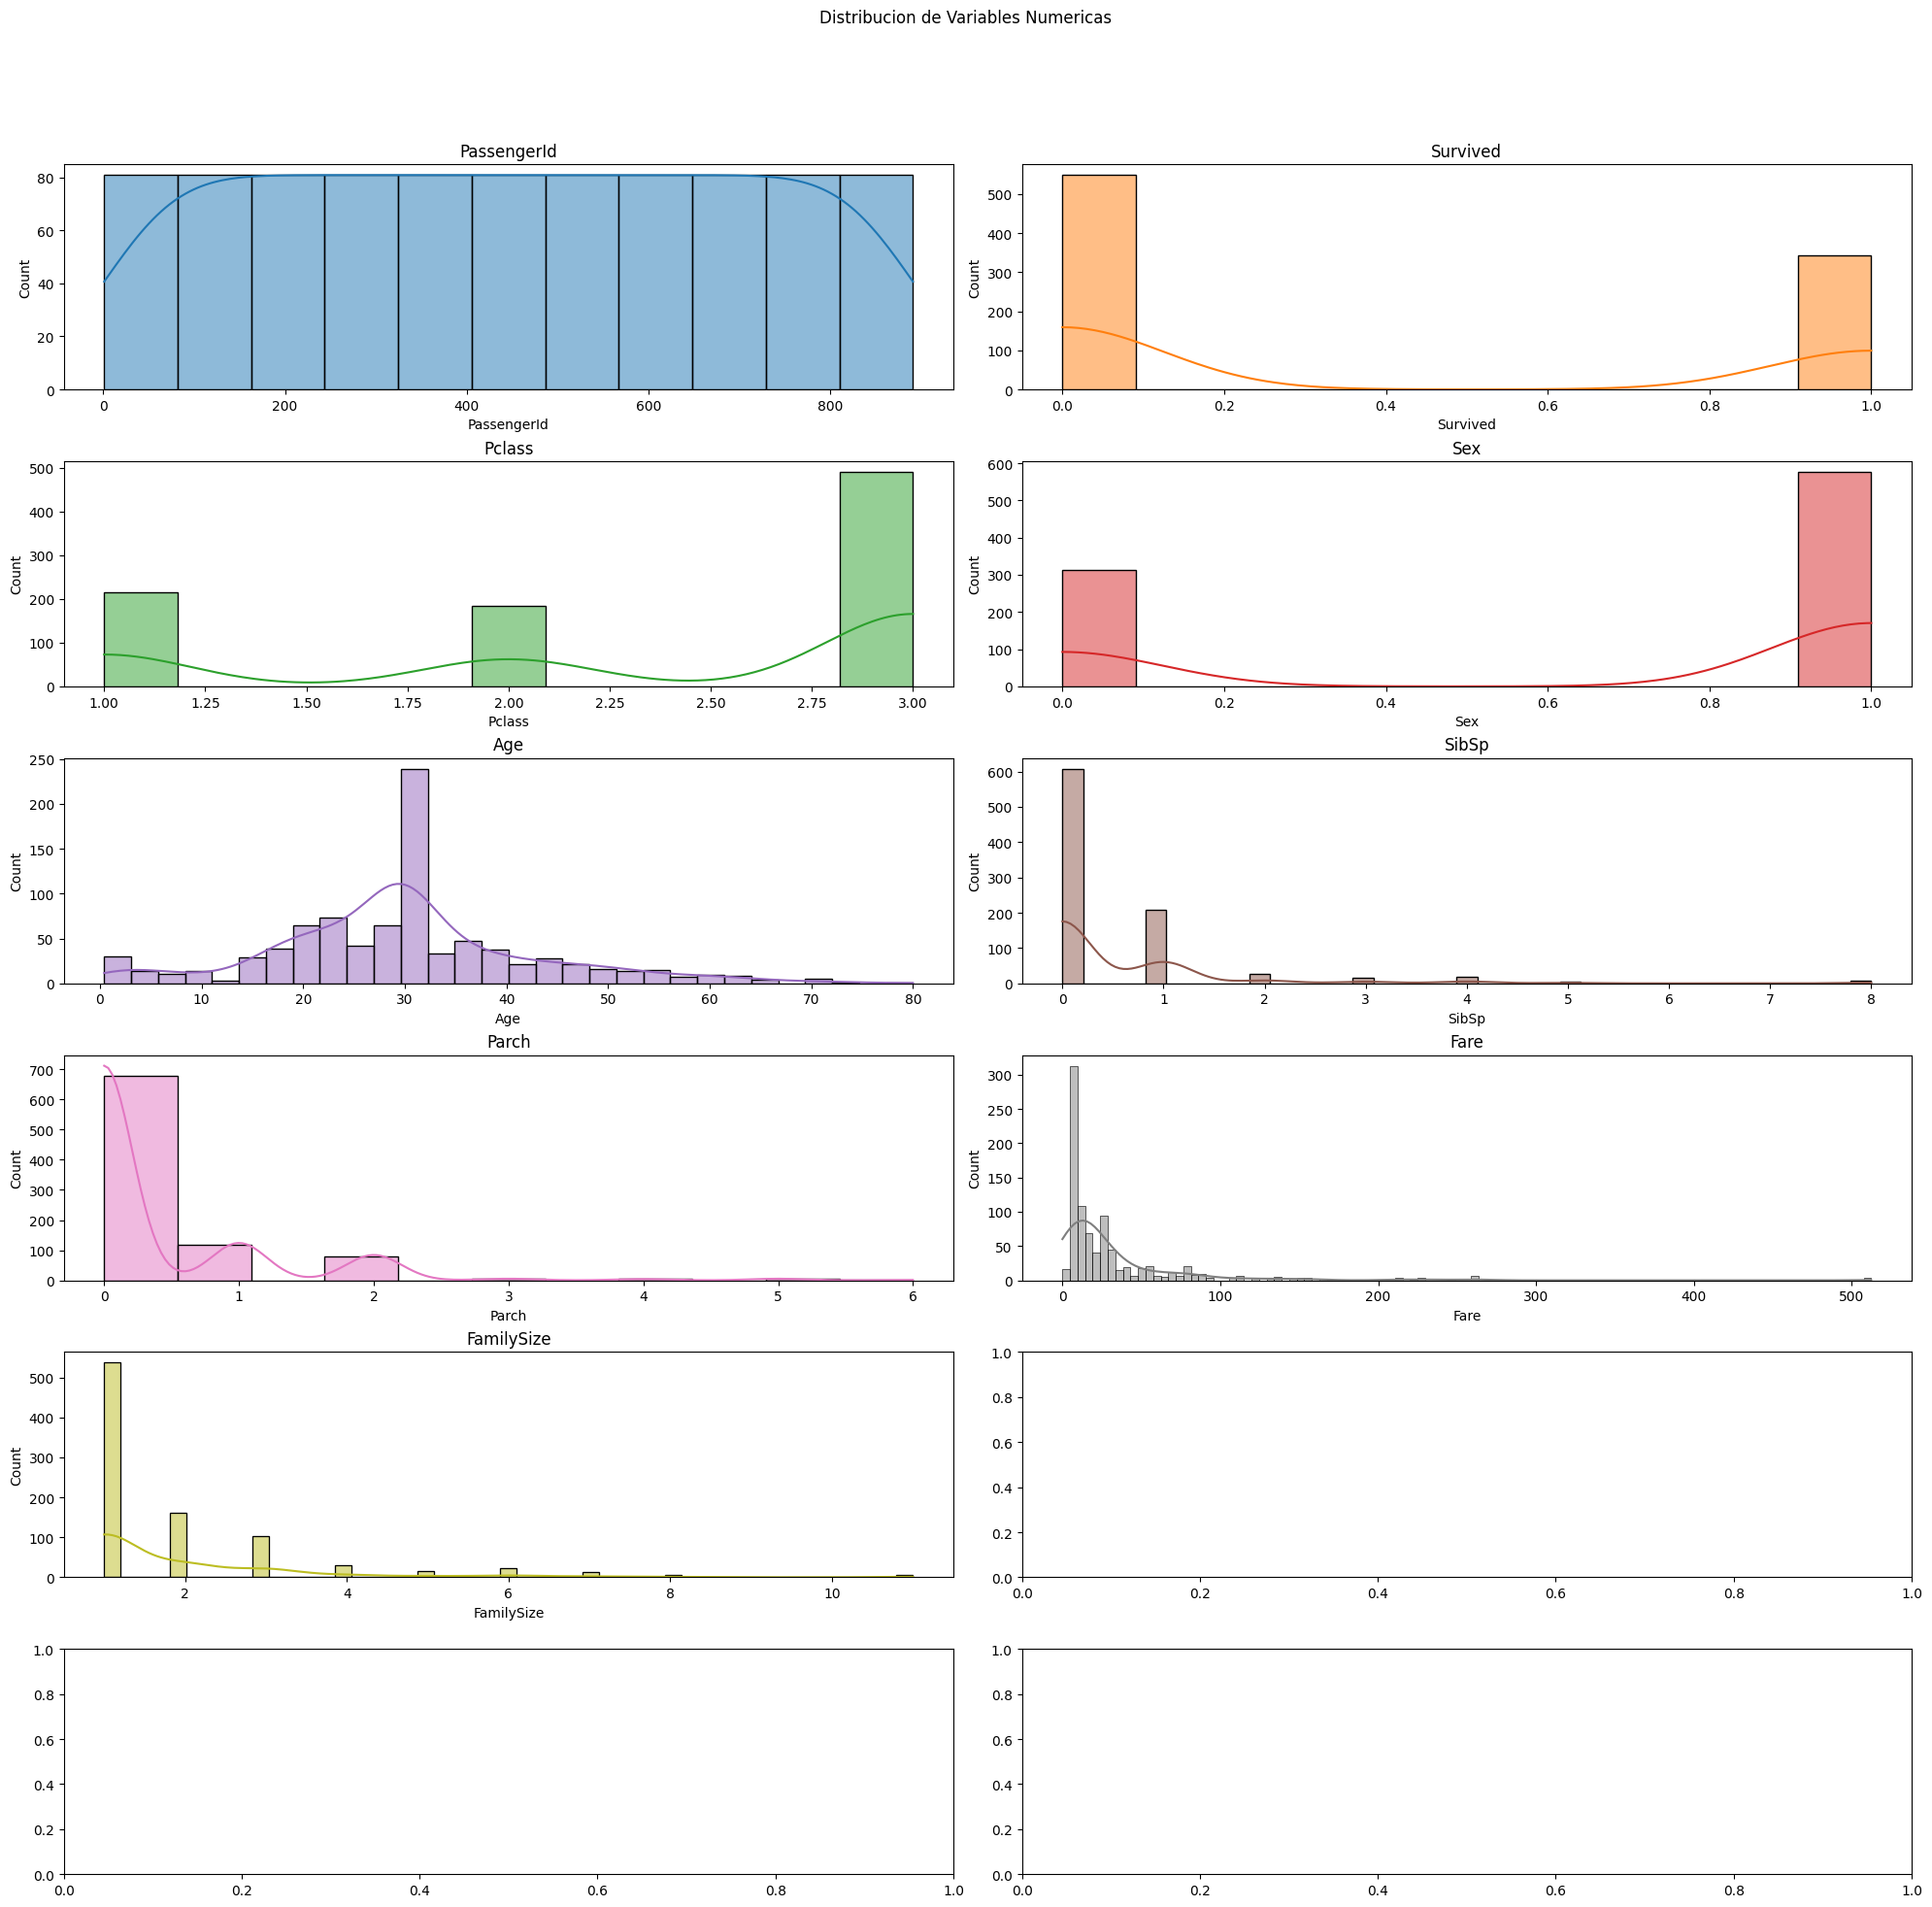

In [98]:
#Now all variables are numerical
##Estadistica Univariada
##Histogramas de frecuencia para variables numericas
fig, ax = plt.subplots(6,2, figsize = (20,20))
ax = ax.flat
num_col = df.select_dtypes(include=['int64','float64','int32']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = df, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'],ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Distribucion de Variables Numericas')
plt.show()

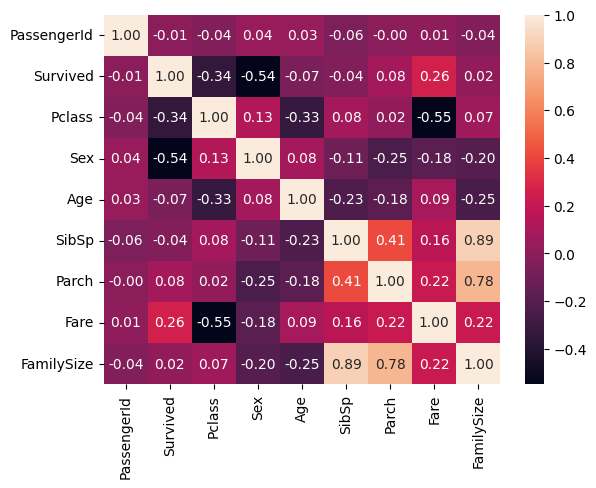

In [99]:
sb.heatmap(data = df.corr(numeric_only= True), annot=True, fmt = '0.2f')
plt.show()

In [100]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   FamilySize   418 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 24.6 KB


# LOGISTIC REGRESSION
Declare Feature Vector And Target Variable


In [101]:
# rspst = dtest[['Survived']].copy()

X = df.drop(['Survived'], axis=1)

y = df['Survived']


Split data into separate training and test set

In [102]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [103]:
dtest

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,892,3,1,34.50000,0,0,7.8292,1
1,893,3,0,47.00000,1,0,7.0000,2
2,894,2,1,62.00000,0,0,9.6875,1
3,895,3,1,27.00000,0,0,8.6625,1
4,896,3,0,22.00000,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,1
414,1306,1,0,39.00000,0,0,108.9000,1
415,1307,3,1,38.50000,0,0,7.2500,1
416,1308,3,1,30.27259,0,0,8.0500,1


Feature Scaling

In [104]:
cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.497507,0.658708,0.653090,0.366394,0.066187,0.065309,0.062192,0.092135
std,0.292468,0.416884,0.476321,0.165000,0.142605,0.136895,0.097858,0.166438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237064,0.500000,0.000000,0.268877,0.000000,0.000000,0.015454,0.000000
50%,0.494938,1.000000,1.000000,0.365929,0.000000,0.000000,0.028217,0.000000
75%,0.753937,1.000000,1.000000,0.432749,0.125000,0.000000,0.061045,0.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model Training

In [105]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [106]:
dtest.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,3


In [107]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,0.556805,1.0,1.0,0.365929,0.000,0.000000,0.028221,0.0
1,0.728909,1.0,1.0,0.365929,0.000,0.000000,0.014737,0.0
2,0.312711,1.0,1.0,0.079793,0.500,0.166667,0.056848,0.5
3,0.034871,0.0,0.0,0.365929,0.125,0.000000,0.285990,0.1
4,0.286839,1.0,0.0,0.357116,0.000,0.333333,0.029758,0.2


Predict Results

In [108]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

Check Accuarcy score

In [109]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7877


In [110]:
#Prediction
y_pred_test_1 = logreg.predict(dtest)
y_pred_test_1

c:\Users\rafaa\Desktop\Data\virtual\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [111]:
submission = pd.DataFrame({
        "PassengerId": dtest["PassengerId"],
        "Survived": y_pred_test_1
    })

submission.to_csv('submission.csv', index=False)

In [112]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,0
3,895,1
4,896,1
